In [1]:
import pandas as pd
import seaborn as sns

In [3]:
diversity = pd.read_csv('data/diversity.csv')
uniform = pd.read_csv('data/uniform.csv')
list(diversity.columns)

['graph_id',
 'users',
 'types',
 'graph_sampler',
 'following_per_user',
 'diversity_step',
 'diversity_max_steps',
 'engagement',
 'prop_engagement']

In [4]:
# Show all interesting unique vals
for c in ['users', 'types', 'graph_sampler', 'following_per_user']:
    print(f'{c}: {list(diversity[c].unique())}')

users: [15, 30, 100]
types: [3, 5]
graph_sampler: ['scaled_gnp', 'preferential_attachment']
following_per_user: [2, 5, 10]


In [5]:
fixed_vals = {
    'graph_sampler': 'scaled_gnp',
    'users': None,
    'types': 5,
    'following_per_user': 5
}

limit_number_of_graphs = None

In [6]:
# Create a subset of the data where fixed_vals are set and only limit_number_of_graphs are included
data_subset = diversity
for col, val in fixed_vals.items():
    if val is not None:
        data_subset = data_subset[data_subset[col] == val]
if limit_number_of_graphs is not None:
    data_subset = data_subset[data_subset.graph_id.isin(data_subset.graph_id.unique()[:limit_number_of_graphs])]

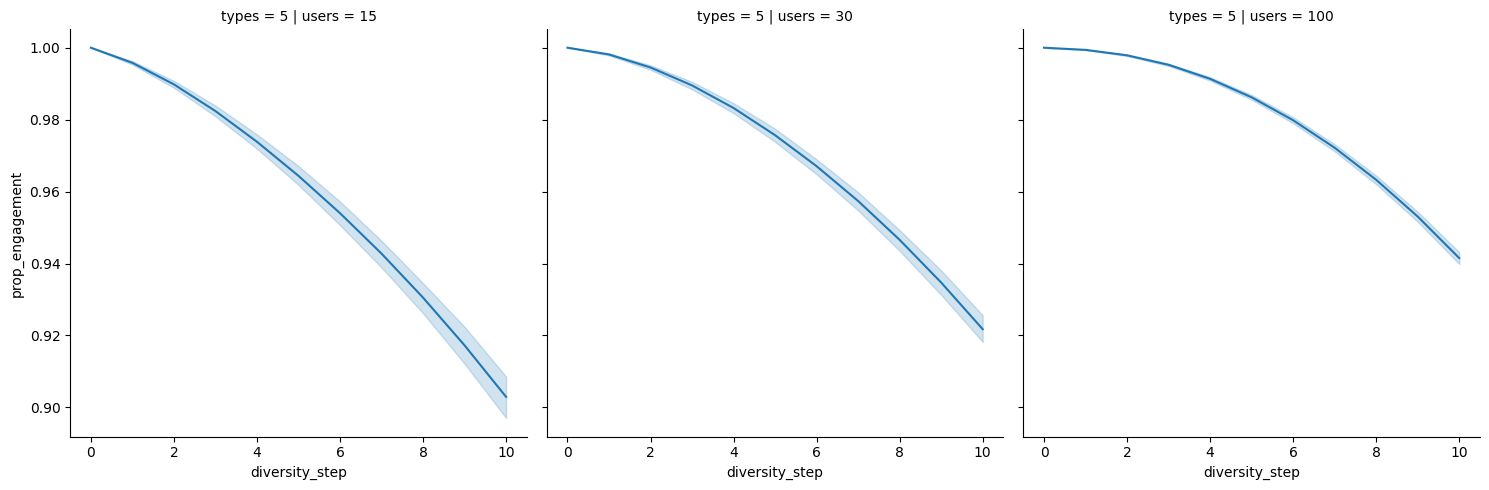

In [7]:
sns.relplot(data=data_subset,
            kind='line',
            x='diversity_step',
            y='prop_engagement',
            col='users',
            row='types'
            )

# Plot theoretical lower bound
# plt.plot(np.arange(11), 1 - np.arange(11) * (fixed_vals['types'] - 1) / 10 / fixed_vals['types'] )